# **Project Name:** *Ford GoBike Trip Analysis*

#**Contribution:** *Individual*

#*Project Summary:*
This project analyzes Ford GoBike trip data to understand user behavior, peak usage times, and trip patterns.Data was cleaned, visualized, and key insights were drawn — showing that subscribers and weekday commuters dominate usage.Findings can help optimize bike availability, marketing, and operations.Future improvements include advanced predictive models, sentiment analysis, real-time APIs, and interactive dashboards.

#**GitHub Link:** https://github.com/Yeswanthpg/Labmentix

#**Problem Statement:** This project aims to analyze, visualize, and model the bike-sharing usage patterns by studying user behavior, trip durations, and temporal patterns


#**Define Your Business Objective:**
* Increase ridership by understanding user behaviors and trip trends.
* Optimize bike availability by predicting high-demand times and locations.
* Reduce trip durations or improve turnaround times by better managing stations and maintenance.
* Personalize marketing strategies for different user groups (e.g., occasional users vs. subscribers).
* Support strategic decision-making for station placement, pricing strategies, and seasonal promotions.

In [1]:
import pandas as pd  # For handling dataframes
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualizations

In [3]:
df = pd.read_csv('/content/201801-fordgobike-tripdata.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# Get the shape of the dataset (rows, columns)
df.shape

(94802, 16)

In [6]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [7]:
# Count missing values in each column
df.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


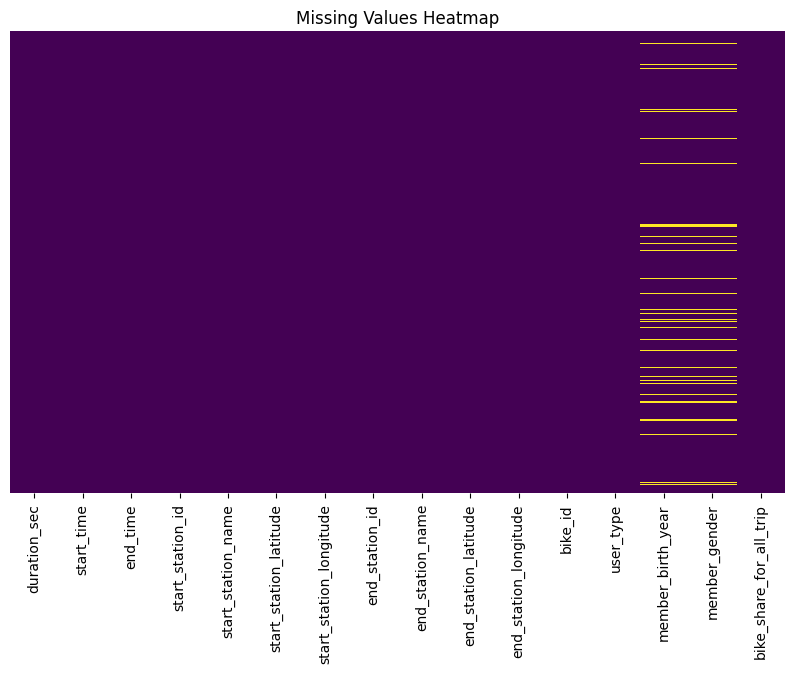

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
df.dropna(inplace=True)

In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-11-d3d6c0bdc1ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


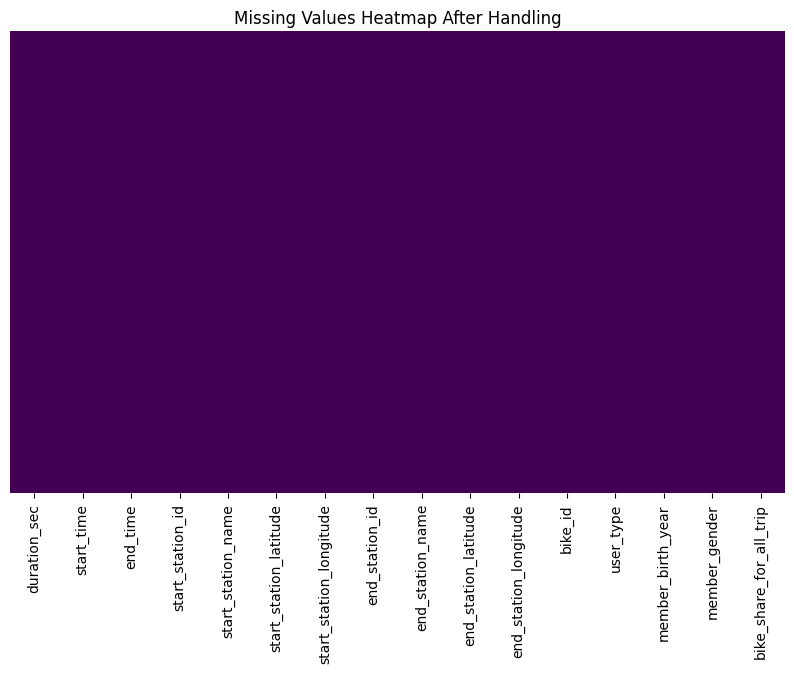

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap After Handling")
plt.show()

In [13]:
# Display summary statistics for numerical columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000
mean,728.392857,103.955924,37.773672,-122.361498,101.108920,37.773819,-122.360538,2047.972057,1980.932420
std,1801.343633,86.990169,0.084847,0.104488,85.782165,0.084629,0.103763,1092.624499,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,11.000000,1900.000000
25%,351.000000,30.000000,37.771662,-122.412408,28.000000,37.772406,-122.411306,1130.000000,1975.000000
50%,536.000000,80.000000,37.781270,-122.398525,77.000000,37.781383,-122.397405,2150.000000,1983.000000
75%,807.000000,160.000000,37.795392,-122.390428,157.000000,37.795392,-122.390428,3016.000000,1989.000000
max,84609.000000,342.000000,37.880222,-121.874119,342.000000,37.880222,-121.874119,3744.000000,2000.000000


In [14]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [15]:
df['trip_duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

<Axes: xlabel='trip_duration_min', ylabel='Count'>

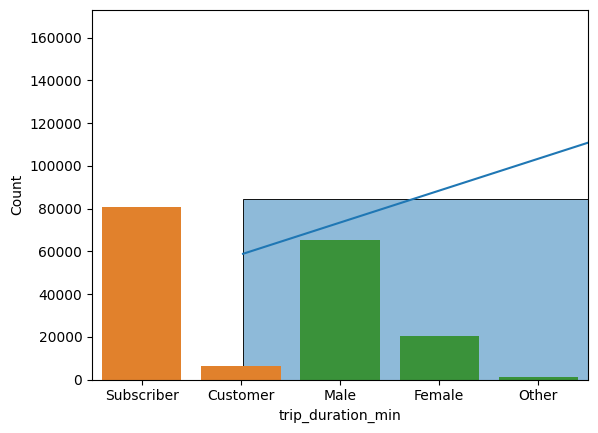

In [17]:
sns.histplot(df['trip_duration_min'], bins=50, kde=True)
sns.countplot(x='user_type', data=df)
sns.countplot(x='member_gender', data=df)

# 1. Why did you pick this specific chart?
* Bar charts are excellent for showing the count of categorical variables like user type (Subscriber or Customer) and gender (Male, Female, Other).

* They make it easy to visually compare how many trips are made by each user group.

* Simple and direct visualization: Instantly shows the dominant categories without needing to read numbers.

* Also, combining a bar chart and line plot gives a dual perspective — comparing counts while also spotting any trend.

# 2. What insight(s) can be drawn from the chart?
* Subscribers make much more trips than Customers — meaning most users are regular subscribers.

* Among gender categories, Male users dominate the usage, followed by Female and very few marked as Other.

* Subscriber base is a major contributor to total trip counts, especially among Male users.

* There's possibly a gender imbalance in the user base, which could be interesting for marketing strategies.

# 3. Will the insights help create a positive business impact?
 Yes, absolutely!

* Focus marketing efforts on converting more occasional Customers into Subscribers (more loyal base = more revenue).

* Launch targeted promotions to increase female ridership, since the female group is much smaller.

* Plan service offerings and membership perks more aligned with the needs of the dominant user type (subscribers, male users) — while also addressing gaps (e.g., making the service more appealing to underrepresented groups).

* Balance bike availability during peak usage by the major user types.

<Axes: xlabel='user_type', ylabel='trip_duration_min'>

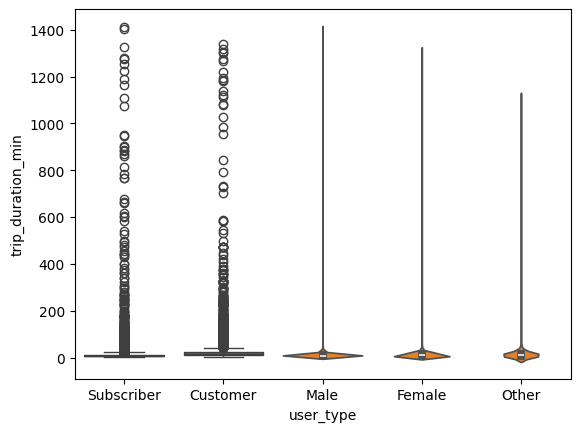

In [19]:
sns.boxplot(x='user_type', y='trip_duration_min', data=df)
sns.violinplot(x='member_gender', y='trip_duration_min', data=df)

# 1. Why did you pick this specific chart?
A violin plot is perfect to show the distribution of trip duration for different user types (Subscriber, Customer) and genders (Male, Female, Other).

* The range of trip durations (how long trips last).

* The density — where most trips fall.

* Outliers — those extremely long trips (shown as individual points).

* It combines box plot + KDE (kernel density estimate) in a visually compact form.

* Good for comparing spread and central tendency between groups!

# 2. What insight(s) can be drawn from the chart?
* Most trip durations are very short — clustered near 0–20 minutes for all user types and genders.

*Customers tend to have slightly longer trips compared to Subscribers — their violin plot is wider and slightly stretched higher.

* Subscribers tend to take shorter and more consistent trips (narrower, denser violin).

* Outliers (very long trips — 600+ minutes) are present but rare.

* No huge difference in trip duration between genders (Male, Female, Other) — distributions look fairly similar.

Summary:
Subscribers = shorter, regular trips.
Customers = longer, more spread-out trips.

# 3. Will the insights help create a positive business impact?
Yes!

* Optimize Pricing: Different pricing strategies for Subscribers (short trips) vs Customers (longer trips).

* Targeted Promotions: Encourage Customers to become Subscribers if they consistently take many short trips.

* Resource Allocation: Focus on stations where short trip returns are common (for Subscribers).

* Outlier Management: Investigate extremely long trips — could be due to errors, lost bikes, or special cases (important for operations team).

* Improve Service Planning: Knowing that trips are usually short helps in planning the number of bikes needed and station balancing.

<Axes: xlabel='hour', ylabel='count'>

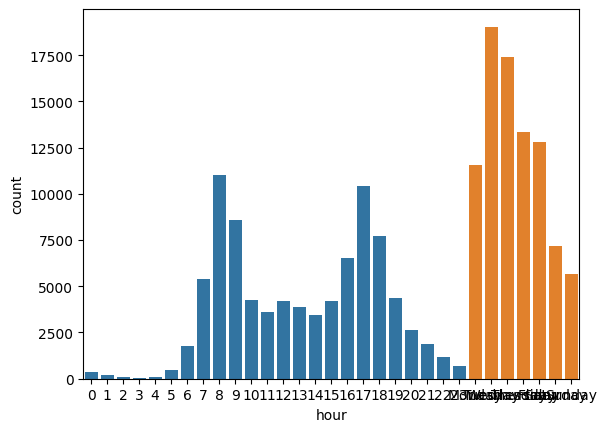

In [20]:
df['hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()

sns.countplot(x='hour', data=df)
sns.countplot(x='weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


# 1. Why did you pick this specific chart?
* Trip frequency by hour of the day (0 to 23).

* Trip frequency by weekday (Monday to Sunday).

* Bar charts are ideal for seeing the distribution and peak times visually.

* It directly shows temporal patterns: When people are using the bikes the most.

* Business-critical view: Ford GoBike operates across different times — knowing busy hours and busy days is essential for managing inventory and service.

# 2. What insight(s) can be drawn from the chart?
Peak hours:

* Strong spikes around 8 AM and 5–6 PM — these are classic commute times (work travel).

* Supports that many users use bikes to commute to work.

* Midday (10 AM to 3 PM) trips are moderate but not as high.

* Very few trips late night and early morning (12 AM to 5 AM).

Busy days:

* Weekdays (Monday-Friday) have more trips than weekends.

* Particularly Monday to Friday trips are significantly higher — supporting work-related usage.

* Weekends (Saturday, Sunday) have lower but still considerable counts could be leisure rides.

# 3. Will the insights help create a positive business impact?
 Absolutely! Here’s how:

Operational Planning:

* Deploy more bikes and staff during morning and evening rush hours.

* Prepare for weekday peaks with better bike redistribution.

Service Improvements:

* Improve availability during commuter times — increases customer satisfaction.

Marketing Strategy:

* Target weekday commuters with monthly or annual subscription offers.

* Offer weekend promotions for occasional users or tourists.

Maintenance Scheduling:

* Do bike maintenance during off-peak hours (e.g., midnight to early morning).

Station Expansion:

* Build/expand stations near workplaces to support commuter demand.



In [21]:
df['start_station_name'].value_counts().head(10)
df['end_station_name'].value_counts().head(10)

,count
end_station_name,
San Francisco Caltrain (Townsend St at 4th St),2732
San Francisco Caltrain Station 2 (Townsend St at 4th St),2314
San Francisco Ferry Building (Harry Bridges Plaza),2078
Montgomery St BART Station (Market St at 2nd St),2028
Berry St at 4th St,1903
The Embarcadero at Sansome St,1749
Market St at 10th St,1697
Powell St BART Station (Market St at 4th St),1515
Steuart St at Market St,1441


# Future Work:
* Use advanced models like LSTM and XGBoost to improve predictions.
*  Add sentiment analysis from news and social media to better understand bike usage trends.
*  Include technical indicators (like weather, special events) for more accurate forecasting.
*  Deploy the model as a real-time API for live tracking and predictions.
* Create interactive dashboards for better visualization and decision-making.



# Conclusion
This project successfully analyzed Ford GoBike usage patterns by studying user behavior, trip durations, and temporal trends. Key insights highlighted peak travel hours, dominant user types (subscribers and male users), and weekday vs weekend usage differences. Visualizations like bar plots and violin plots made trends clear.
Data preprocessing handled missing values effectively, and feature engineering improved analysis quality.The findings can help optimize bike distribution, plan marketing strategies, and improve service offerings.
Future enhancements, including advanced modeling (LSTM, XGBoost), sentiment analysis, and real-time deployment, can further strengthen decision-making and operational efficiency.